<h1>Statistical Analysis</h3>

<h2>Load Data</h2>

In [22]:
import pandas as pd

# Load data
file_path = './facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv'
facial_expression_data = df = pd.read_csv(file_path, low_memory=False)

facial_expression_data.head()

,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
2,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
3,4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55


In [23]:
import pandas as pd
import numpy as np

# Sorting by respondent and timestamp
facial_expression_data.sort_values(by=['Respondent', 'Timestamp'], inplace=True)

# Function to merge every two rows for a given respondent
def merge_two_rows(group):
    new_rows = []
    # Iterating over pairs of rows
    for i in range(0, len(group), 2):
        if i + 1 < len(group):  # Ensure there is a pair
            row1 = group.iloc[i]
            row2 = group.iloc[i + 1]
            merged_row = row1.combine_first(row2)  # Combine two rows, taking the first non-NaN value
            new_rows.append(merged_row)
        else:  # If an odd row is left without a pair, just take it as is
            new_rows.append(group.iloc[i])
    return pd.DataFrame(new_rows)

# Applying the function to each group
merged_data = facial_expression_data.groupby('Respondent', as_index=False).apply(merge_two_rows).reset_index(drop=True)

# Displaying some of the merged data
print(merged_data.head())


   Unnamed: 0  Timestamp     Anger  Contempt   Disgust      Fear       Joy  \
0           1  36109.900  0.125566  0.186393  0.023706  0.125796  0.025453   
1           3  36269.000  0.125833  0.186909  0.023738  0.126169  0.025312   
2           5  36301.000  0.126258  0.187818  0.023798  0.126605  0.025114   
3           7  36333.000  0.126290  0.188413  0.023834  0.126583  0.024996   
4           9  36371.192  0.126344  0.188792  0.023866  0.126641  0.024909   

    Sadness  Surprise  Engagement  ...  Fixation Dispersion  Saccade Duration  \
0  0.125512  0.055428    0.328766  ...                  NaN          887.4785   
1  0.125694  0.055510    0.328766  ...                  NaN          887.4785   
2  0.125970  0.055607    0.328766  ...                  NaN          887.4785   
3  0.126124  0.055529    0.328766  ...                  NaN          887.4785   
4  0.126202  0.055519    0.328766  ...                  NaN          887.4785   

   Saccade Amplitude  Saccade Peak Velocity 

In [26]:
merged_data.to_csv('./datasets/merged_data_march_10_2024.csv')

In [24]:
import pandas as pd

# Count rows with at least one NaN
rows_with_nan = merged_data.isnull().any(axis=1).sum()

print(f'Number of rows with at least one NaN: {rows_with_nan}')


Number of rows with at least one NaN: 625958


In [25]:
# Get the total number of rows
total_rows = merged_data.shape[0]

print(f'Total number of rows: {total_rows}')


Total number of rows: 630607


<h3>Grades Frequency<h3>

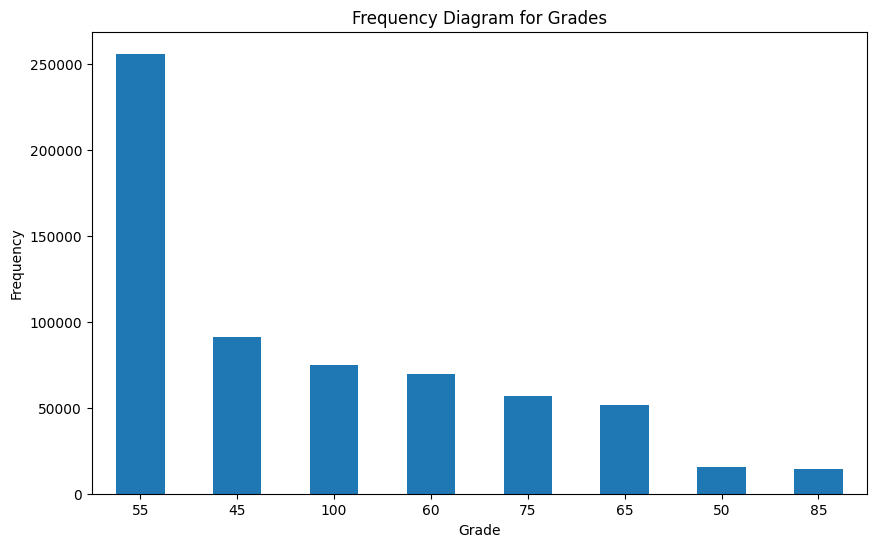

In [27]:
import matplotlib.pyplot as plt

# Count the frequency of each grade
grade_counts = merged_data['Grade'].value_counts()

# Plotting the frequency diagram (bar chart) for grades
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar')
plt.title('Frequency Diagram for Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the grade labels horizontal for readability
plt.show()

<h3>Frequency for 55 or Below and Above 55</h3>

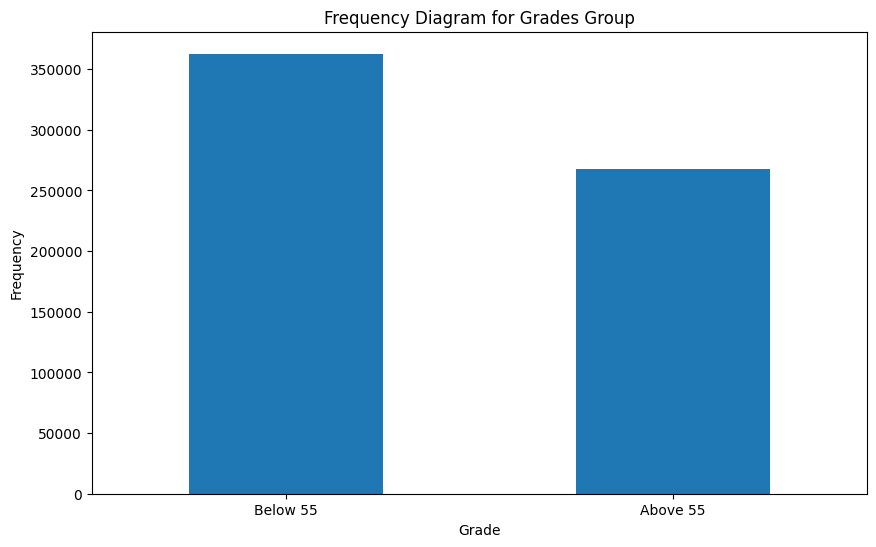

In [28]:
import matplotlib.pyplot as plt

# Count the frequency of each grade
grade_counts = merged_data['Grade Group'].value_counts()

# Plotting the frequency diagram (bar chart) for grades
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar')
plt.title('Frequency Diagram for Grades Group')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the grade labels horizontal for readability
plt.show()

<h3>Wilcoxon Test for Session Duration</h3>

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Calculate the count of data points for each respondent in each group
data_points_count = facial_expression_data.groupby(['Respondent', 'Grade Group']).size().reset_index(name='counts')

# Directly filter counts for each grade group
group1_counts = data_points_count[data_points_count['Grade Group'] == 'Below 55']['counts']
group2_counts = data_points_count[data_points_count['Grade Group'] == 'Above 55']['counts']

# Perform the Mann-Whitney U test for unpaired samples
u_statistic, p_value = mannwhitneyu(group1_counts, group2_counts)

print(f'U statistic: {u_statistic}, P-value: {p_value}')


U statistic: 41.0, P-value: 0.3822843822843822


<h5>There is no statistically significant difference in the session lengths between the two grade groups</h5>

<h2>Mean Values per Respondent</h2>

In [34]:
import pandas as pd

# Load data
file_path = './datasets/merged_data_march_9_2024.csv'
merged_data_from_file = df = pd.read_csv(file_path, low_memory=False)

merged_data_from_file.head()

,Unnamed: 0.1,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,0,1,36109.900,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,1,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
2,2,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
3,3,7,36333.000,0.126290,0.188413,0.023834,0.126583,0.024996,0.126124,0.055529,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,4,9,36371.192,0.126344,0.188792,0.023866,0.126641,0.024909,0.126202,0.055519,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55


In [35]:
merged_data_from_file.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'Anger', 'Contempt',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement',
       'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention',
       'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw',
       'Roll', 'Gaze Velocity', 'Gaze Acceleration', 'Fixation Duration',
       'Fixation Dispersion', 'Saccade Duration', 'Saccade Amplitude',
       'Saccade Peak Velocity', 'Saccade Peak Acceleration',
       'Saccade Peak Deceleration', 'Saccade Direction', 'Respondent', 'Grade',
       'Grade Group'],
      dtype='object')

In [41]:
import pandas as pd
import numpy as np

columns_to_average = ['Anger', 'Contempt',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement',
       'Sentimentality', 'Confusion',
       'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler',
       'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Grade'] 

# Calculate the mean for the specified columns for each respondent
mean_values_per_respondent = merged_data_from_file.groupby('Respondent')[columns_to_average].mean()

# Reset the index so 'respondent' becomes a column again, if desired
mean_values_per_respondent.reset_index(inplace=True)

# Your new DataFrame is ready
print(mean_values_per_respondent)


    Respondent     Anger  Contempt   Disgust      Fear       Joy   Sadness  \
0            1  1.163229  0.254944  0.392873  1.440810  6.499545  0.268705   
1            2  1.544074  2.332416  0.481205  1.416028  0.570981  0.424949   
2            3  1.858315  0.574013  0.342346  2.387849  1.129676  0.135473   
3            4  1.167415  2.292135  0.699927  0.777726  3.815992  0.357908   
4            5  0.552830  3.125797  0.089759  0.258266  4.016242  1.487197   
5            6  8.371885  2.973906  0.435012  1.800351  1.511287  3.069498   
6            7  3.211663  0.417058  3.233845  6.290075  0.235173  0.428236   
7           11  0.632462  2.399202  0.215795  0.768360  0.586414  0.248303   
8           12  0.242796  0.747420  0.072324  0.448235  0.033139  0.295336   
9           13  0.668233  0.846188  0.535587  0.994689  1.970158  0.447267   
10          14  0.545129  0.852923  0.332178  0.500468  0.313378  1.406741   
11          15  0.573985  1.195806  0.245548  0.918351  5.470982

In [42]:
mean_values_per_respondent.to_csv('./datasets/facial_mean_values_per_respondent_9_3_2024_2.csv')

<h2>Mixed Linear Model</h2>

In [50]:
# Melting the DataFrame
long_format_df = pd.melt(mean_values_per_respondent, id_vars=['Respondent','Grade'], var_name='Facial_Expressions', value_name='Value')

# Sorting the DataFrame by 'respondent'
long_format_df_sorted = long_format_df.sort_values(by='Respondent')

print(long_format_df_sorted)

long_format_df_sorted.to_csv('./datasets/respondent_means_long_format_march_9_2024.csv')

     Respondent  Grade Facial_Expressions      Value
0             1  100.0              Anger   1.163229
64            1  100.0                Joy   6.499545
80            1  100.0            Sadness   0.268705
96            1  100.0           Surprise   0.674075
112           1  100.0         Engagement  22.516467
..          ...    ...                ...        ...
415          19   55.0         Mouth Open  21.353704
431          19   55.0       Nose Wrinkle   1.163233
447          19   55.0              Smile   3.607699
479          19   55.0    Upper Lip Raise   2.923415
511          19   55.0          BlinkRate  13.573540

[512 rows x 4 columns]


In [51]:
import statsmodels.formula.api as smf

# Model formula: "Value ~ Grade + Facial_Expressions"
# This specifies 'Value' as the outcome, 'Grade' and 'Facial_Expressions' as fixed effects
# 'Respondent' is specified as a random effect
model = smf.mixedlm("Value ~ Grade + Facial_Expressions", long_format_df_sorted, groups=long_format_df_sorted["Respondent"])
result = model.fit()

# Print the summary of the model to see the results
print(result.summary())


                        Mixed Linear Model Regression Results
Model:                       MixedLM          Dependent Variable:          Value     
No. Observations:            512              Method:                      REML      
No. Groups:                  16               Scale:                       33.0673   
Min. group size:             32               Log-Likelihood:              -1573.7149
Max. group size:             32               Converged:                   Yes       
Mean group size:             32.0                                                    
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                   3.443    2.074  1.660 0.097 -0.622  7.507
Facial_Expressions[T.Blink]                -1.493    2.033 -0.734 0.463 -5.478

C:\Users\user\AppData\Local\Temp\ipykernel_72272\3517639322.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Coefficient', y='Variable', data=fe_df, join=False, capsize=0.1, markers='o', color='blue', ci=None)


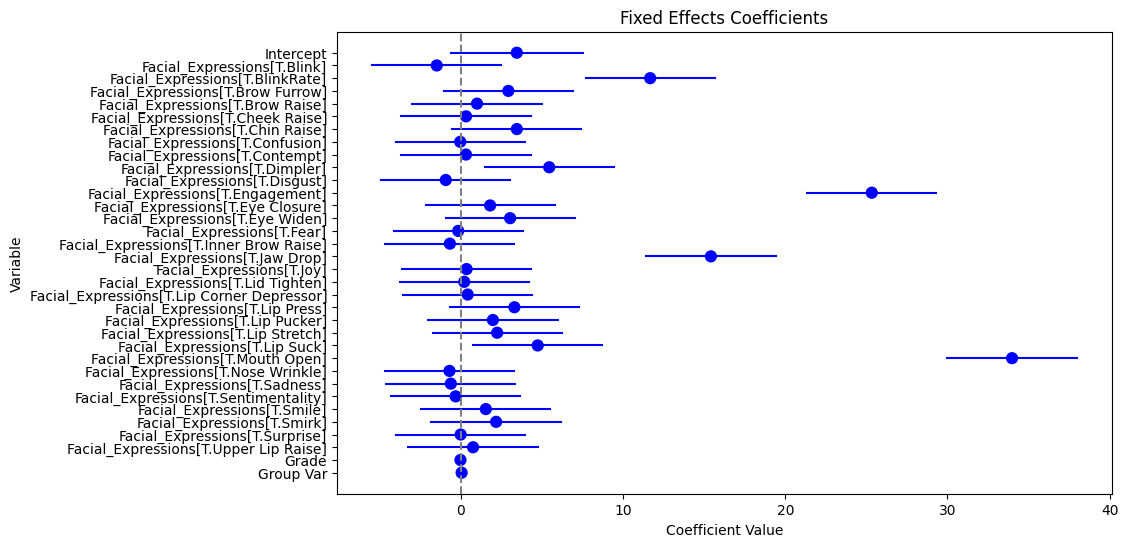

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Get the fixed effects parameters
fe_params = result.params

# Get the confidence intervals for the fixed effects
fe_confint = result.conf_int()

# Correctly handle the confidence intervals
fe_df = pd.DataFrame({'Coefficient': fe_params, 'Lower CI': fe_confint.iloc[:, 0], 'Upper CI': fe_confint.iloc[:, 1]})
fe_df.reset_index(inplace=True)
fe_df.rename(columns={'index': 'Variable'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Variable', data=fe_df, join=False, capsize=0.1, markers='o', color='blue', ci=None)

# Manually adding error bars for clarity
for i, row in fe_df.iterrows():
    plt.plot([row['Lower CI'], row['Upper CI']], [i, i], color='blue')

plt.axvline(x=0, color='grey', linestyle='--')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.title('Fixed Effects Coefficients')
plt.show()


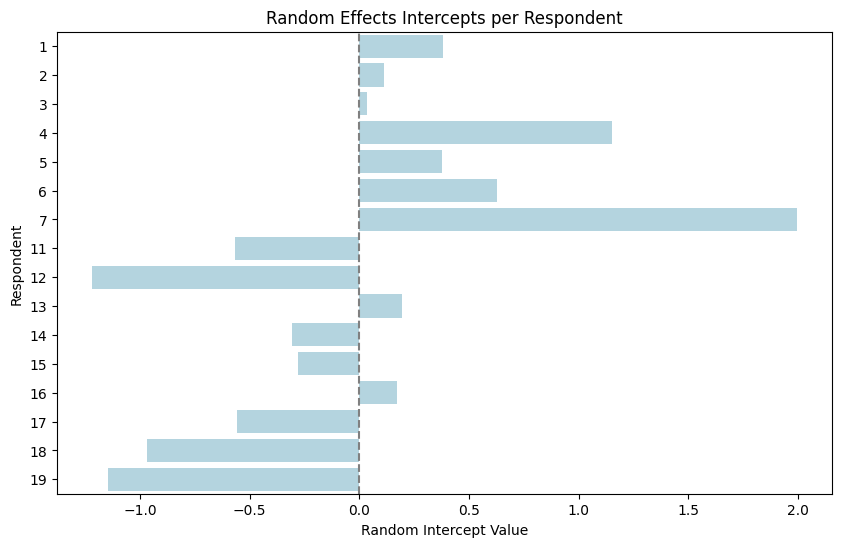

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'result' is the fitted mixed-effects model result from statsmodels

# Extract random effects
re_df = pd.DataFrame(result.random_effects).T

# The DataFrame now has random intercepts (and possibly slopes, if modeled) for each group (respondent)
# For simplicity, let's assume you're only interested in random intercepts, which are typically the first column if you also have slopes
# If you only modeled random intercepts, the below simplification is not needed

# Reset index to make 'Respondent' a column
re_df.reset_index(inplace=True)
re_df.rename(columns={'index': 'Respondent'}, inplace=True)

# Assuming the intercept is named 'Group' or simply the only column besides 'Respondent'
# If it's named differently, adjust the column name accordingly
if 'Group' in re_df.columns:
    intercept_column = 'Group'
else:
    intercept_column = re_df.columns[1]  # Assuming the first column after 'Respondent' is the intercept

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=intercept_column, y='Respondent', data=re_df, color='lightblue', orient='h')
plt.axvline(x=0, color='grey', linestyle='--')
plt.xlabel('Random Intercept Value')
plt.ylabel('Respondent')
plt.title('Random Effects Intercepts per Respondent')
plt.show()


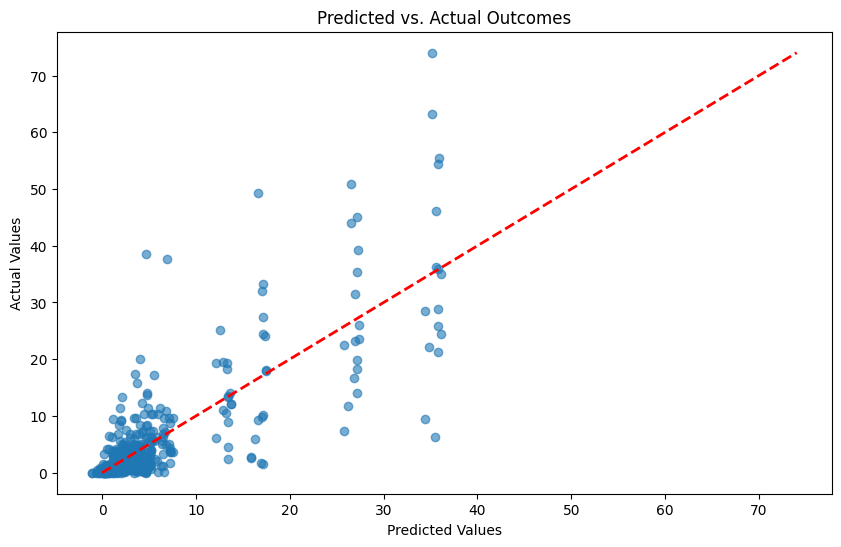

In [53]:
# Generate predictions
predictions = result.predict()

# Assuming 'long_format_df_sorted' contains the actual outcome in a column named 'value'
plt.figure(figsize=(10, 6))
plt.scatter(predictions, long_format_df_sorted['Value'], alpha=0.6)
plt.plot([long_format_df_sorted['Value'].min(), long_format_df_sorted['Value'].max()], 
         [long_format_df_sorted['Value'].min(), long_format_df_sorted['Value'].max()], 
         'red', lw=2, linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Outcomes')
plt.show()


<h2>Linear Regression</h2>

In [59]:
import statsmodels.api as sm


X = sm.add_constant(mean_values_per_respondent[['Anger', 'Contempt',
       'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement',
       'Sentimentality', 'Confusion',]])  
y = mean_values_per_respondent['Grade']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1.284
Date:                Sat, 09 Mar 2024   Prob (F-statistic):              0.413
Time:                        18:22:06   Log-Likelihood:                -57.857
No. Observations:                  16   AIC:                             137.7
Df Residuals:                       5   BIC:                             146.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            107.5456     17.450      6.

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


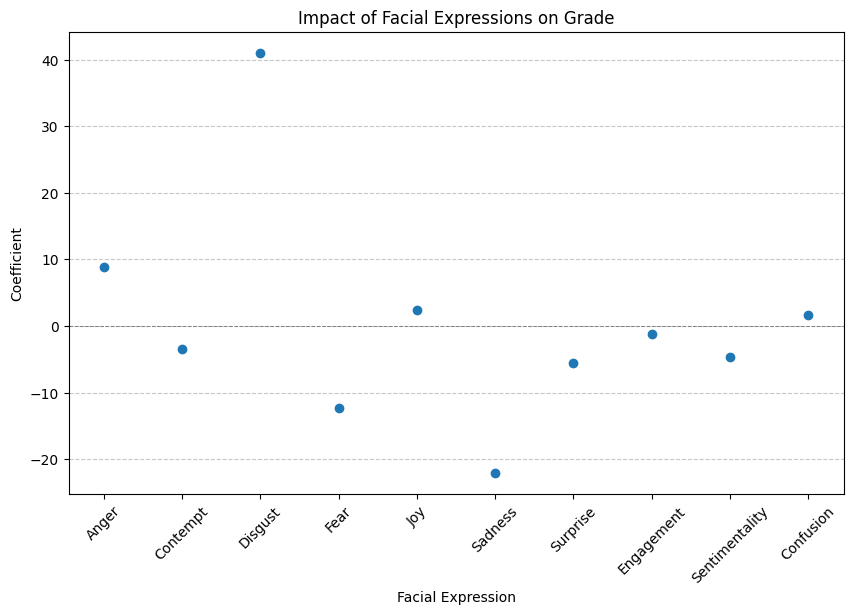

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'model' is your fitted OLS model from statsmodels
coefficients = model.params[1:]  # Exclude the intercept
conf_int = model.conf_int().iloc[1:]  # Exclude the intercept CI
conf_int.columns = ['Lower CI', 'Upper CI']

# Convert to DataFrame for easier plotting
coef_df = pd.DataFrame(coefficients).reset_index()
coef_df.columns = ['Facial Expression', 'Coefficient']
coef_df['Lower CI'] = conf_int['Lower CI']
coef_df['Upper CI'] = conf_int['Upper CI']

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(coef_df['Facial Expression'], coef_df['Coefficient'], 
             yerr=(coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']), 
             fmt='o', capsize=5, capthick=2)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.title('Impact of Facial Expressions on Grade')
plt.xlabel('Facial Expression')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


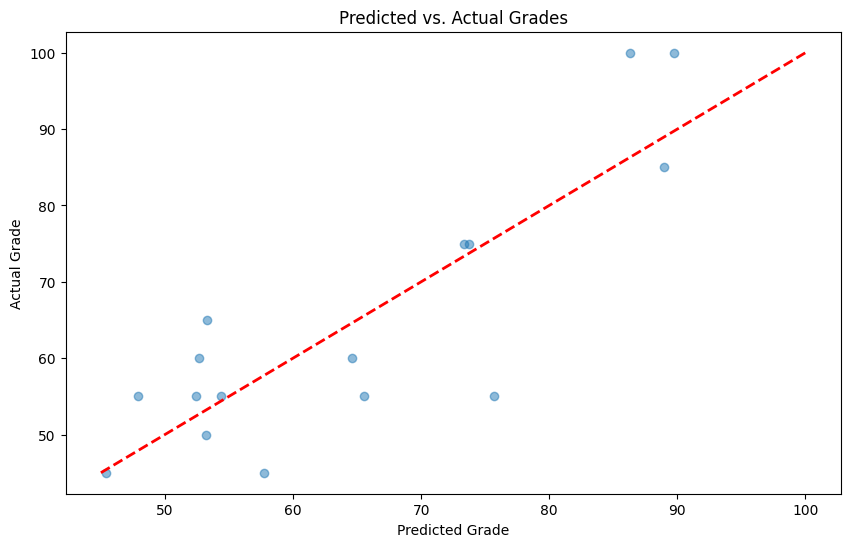

In [62]:
import matplotlib.pyplot as plt

# Regenerate predictions to ensure alignment with the actual grades
predictions = model.predict(X)

# Make sure 'predictions' aligns with the actual grades 'y'
if len(predictions) == len(y):
    plt.figure(figsize=(10, 6))
    plt.scatter(predictions, y, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Line for perfect predictions
    plt.title('Predicted vs. Actual Grades')
    plt.xlabel('Predicted Grade')
    plt.ylabel('Actual Grade')
    plt.show()
else:
    print("The lengths of predictions and actual grades do not match.")
